In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import shutil 
from tqdm import tqdm

In [2]:
copd = pd.read_csv("/fs5/p_masi/krishar1/COPDGENE/COPD-gene-progress_updated.csv")
copd

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
0,chest,control,2,DS-CS,no,tar,COPDGene_R27796_COPDGene_R27796.tar,phs000179,0,CT,d1984536,African American,male,985333760,1944.0
1,chest,control,2,DS-CS,Yes,tar,COPDGene_L26505.tar.gz,phs000179,GOLD_0_Control,CT,d1992782,Caucasian,male,679836847,1317.0
2,chest,control,2,DS-CS,Yes,tar,COPDGene_A65347_COPDGene_A65347.tar,phs000179,0,CT,d1984561,African American,female,1239736320,73.0
3,chest,case,2,DS-CS,Yes,tar,COPDGene_K93612_COPDGene_K93612.tar,phs000179,3,CT,d1984658,Caucasian,male,1131806720,NaN
4,chest,control,2,DS-CS,no,tar,COPDGene_Z48649_COPDGene_Z48649.tar,phs000179,0,CT,d1984559,African American,male,740085760,3045.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12098,chest,control,1,HMB,no,tar,COPDGene_W67783_COPDGene_W67783.tar,phs000179,0,CT,d1984409,European-American,male,1200496640,NaN
12099,chest,control,1,HMB,Yes,tar,COPDGene_Q19809.tar.gz,phs000179,GOLD_0_Control,CT,d1992305,Caucasian,female,529506641,1819.0
12100,chest,case,1,HMB,Yes,tar,COPDGene_D70993_COPDGene_D70993.tar,phs000179,3,CT,d1979500,Caucasian,male,1129728000,NaN
12101,chest,Other,1,HMB,Yes,tar,COPDGene_C63452.tar.gz,phs000179,GOLD_1,CT,d1992576,Caucasian,male,1300595977,NaN


In [3]:
copd_available = copd[copd['Downloaded'] == 'Yes']
copd_available

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
1,chest,control,2,DS-CS,Yes,tar,COPDGene_L26505.tar.gz,phs000179,GOLD_0_Control,CT,d1992782,Caucasian,male,679836847,1317.0
2,chest,control,2,DS-CS,Yes,tar,COPDGene_A65347_COPDGene_A65347.tar,phs000179,0,CT,d1984561,African American,female,1239736320,73.0
3,chest,case,2,DS-CS,Yes,tar,COPDGene_K93612_COPDGene_K93612.tar,phs000179,3,CT,d1984658,Caucasian,male,1131806720,NaN
5,chest,control,2,DS-CS,Yes,tar,COPDGene_A16021_COPDGene_A16021.tar,phs000179,0,CT,d1984560,African American,female,956508160,18.0
9,chest,case,2,DS-CS,Yes,tar,COPDGene_B06247_COPDGene_B06247.tar,phs000179,2,CT,d1984638,Caucasian,male,1488998400,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12096,chest,case,1,HMB,Yes,tar,COPDGene_A75350_COPDGene_A75350.tar,phs000179,3,CT,d1975493,African American,male,1664419840,NaN
12097,chest,Other,1,HMB,Yes,tar,COPDGene_J98253.tar.gz,phs000179,GOLD-U_Unclassified,CT,d1992524,Caucasian,female,732535261,NaN
12099,chest,control,1,HMB,Yes,tar,COPDGene_Q19809.tar.gz,phs000179,GOLD_0_Control,CT,d1992305,Caucasian,female,529506641,1819.0
12100,chest,case,1,HMB,Yes,tar,COPDGene_D70993_COPDGene_D70993.tar,phs000179,3,CT,d1979500,Caucasian,male,1129728000,NaN


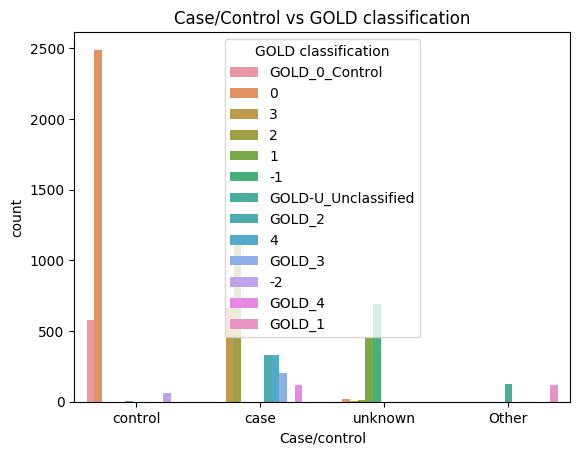

In [4]:
#Make a countplot of Case/control vs GOLD classification
sns.countplot(x='Case/control', data=copd_available, hue='GOLD classification')
plt.title('Case/Control vs GOLD classification')
plt.show()

In [5]:
#Randomly sample 1000 subjects from the dataset for SPIE
copd_sample = copd_available.sample(n=1000, random_state=1)
copd_sample

,Body Site,Case/control,Consent code,Consent,Downloaded,File format,File Name,Study PHS,GOLD classification,Image type,local_id,Population,Sex,Size,Unnamed: 14
6064,chest,unknown,1,HMB,Yes,tar,COPDGene_H43475_COPDGene_H43475.tar,phs000179,1,CT,d1984006,Caucasian,female,932229120,NaN
9795,chest,control,1,HMB,Yes,tar,COPDGene_F36155.tar.gz,phs000179,GOLD_0_Control,CT,d1992172,Caucasian,female,1217227680,703.0
5621,chest,case,1,HMB,Yes,tar,COPDGene_J75976_COPDGene_J75976.tar,phs000179,2,CT,d1978333,Caucasian,male,1332592640,NaN
1428,chest,case,1,HMB,Yes,tar,COPDGene_C30122_COPDGene_C30122.tar,phs000179,4,CT,d1980219,Caucasian,male,1202606080,NaN
629,chest,unknown,1,HMB,Yes,tar,COPDGene_P79583_COPDGene_P79583.tar,phs000179,1,CT,d1984055,Caucasian,female,1958625280,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,chest,case,1,HMB,Yes,tar,COPDGene_E01371_COPDGene_E01371.tar,phs000179,4,CT,d1984340,European-American,female,1416079360,NaN
10168,chest,case,1,HMB,Yes,tar,COPDGene_P28174.tar.gz,phs000179,GOLD_3,CT,d1990468,African,male,498893895,NaN
4875,chest,control,1,HMB,Yes,tar,COPDGene_B59490.tar.gz,phs000179,GOLD_0_Control,CT,d1990549,African,male,761147279,NaN
4440,chest,case,1,HMB,Yes,tar,COPDGene_E80919_COPDGene_E80919.tar,phs000179,3,CT,d1975624,African American,female,954398720,NaN


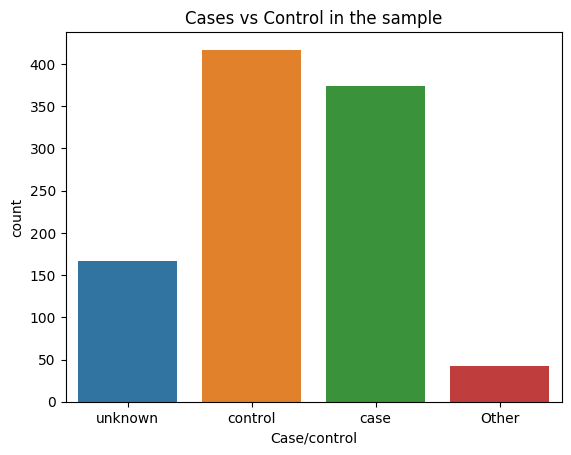

In [6]:
#plot cases vs control in the sample
sns.countplot(x='Case/control', data=copd_sample)
plt.title('Cases vs Control in the sample')
plt.show()

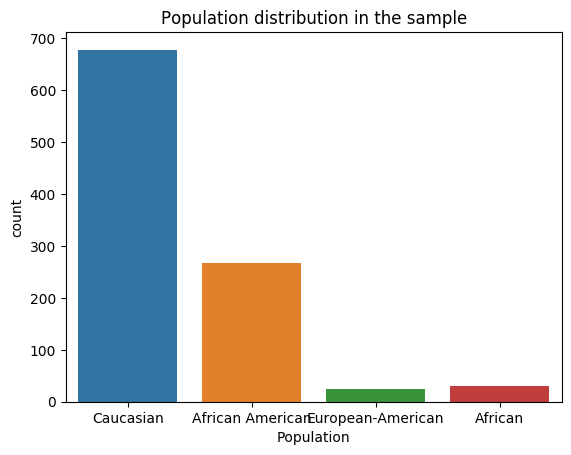

In [7]:
#Plot the population and sex distribution in the sample
sns.countplot(x='Population', data=copd_sample)
plt.title('Population distribution in the sample')
plt.show()

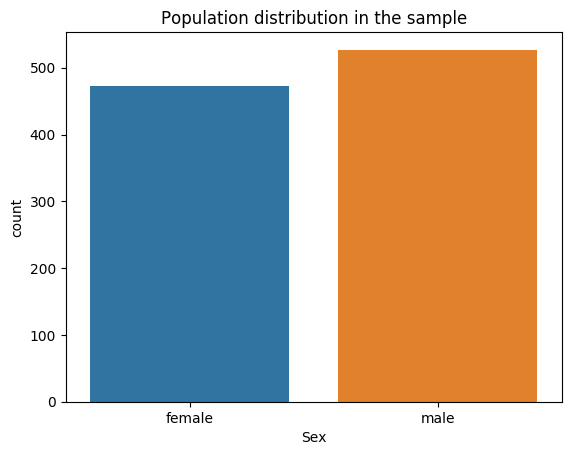

In [8]:
#Plot sex distribution in the sample
sns.countplot(x='Sex', data=copd_sample)
plt.title('Population distribution in the sample')
plt.show()

In [9]:
#strip the .tar or the .tar.gz format from the file names
copd_sample['File Name'] = copd_sample['File Name'].str.replace('.tar', '')
copd_sample['File Name'] = copd_sample['File Name'].str.replace('.gz', '')

/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/home/local/VANDERBILT/krishar1/anaconda/envs/lung2/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
copd_subjects = copd_sample['File Name'].tolist()
copd_subjects

['COPDGene_H43475_COPDGene_H43475',
 'COPDGene_F36155',
 'COPDGene_J75976_COPDGene_J75976',
 'COPDGene_C30122_COPDGene_C30122',
 'COPDGene_P79583_COPDGene_P79583',
 'COPDGene_B92822_COPDGene_B92822',
 'COPDGene_J06575_COPDGene_J06575',
 'COPDGene_J94360_COPDGene_J94360',
 'COPDGene_K13612_COPDGene_K13612',
 'COPDGene_G80153_COPDGene_G80153',
 'COPDGene_F18016_COPDGene_F18016',
 'COPDGene_C72364_COPDGene_C72364',
 'COPDGene_Q66767_COPDGene_Q66767',
 'COPDGene_A52770',
 'COPDGene_P98177_COPDGene_P98177',
 'COPDGene_E32093_COPDGene_E32093',
 'COPDGene_G45599_COPDGene_G45599',
 'COPDGene_P19733_COPDGene_P19733',
 'COPDGene_J12592_COPDGene_J12592',
 'COPDGene_J75358_COPDGene_J75358',
 'COPDGene_Q40002',
 'COPDGene_A86105_COPDGene_A86105',
 'COPDGene_E99994',
 'COPDGene_P25039_COPDGene_P25039',
 'COPDGene_F84738_COPDGene_F84738',
 'COPDGene_Q20296_COPDGene_Q20296',
 'COPDGene_N44787_COPDGene_N44787',
 'COPDGene_F02001_COPDGene_F02001',
 'COPDGene_F25079',
 'COPDGene_P78672_COPDGene_P78672',


In [11]:
#Save the datframe to a csv file
copd_sample.to_csv('/fs5/p_masi/krishar1/COPDGENE/COPDgene_SPIE2025.csv', index=False)

In [49]:
#Copy the directory to a new folder using rsync
for subject in tqdm(copd_subjects):
    os.system(f'rsync -avzh --progress /fs5/p_masi/krishar1/COPDGENE/subjects/{subject} /nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/raw_data')

rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)


sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  21.33 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]
rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]



sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list

sent 20 bytes  received 12 bytes  64.00 bytes/sec
total size is 0  speedup is 0.00
sending incremental file list


rsync: change_dir "/fs5/p_masi/krishar1/COPDGENE/subjects" failed: No such file or directory (2)
rsync error: some files/attrs were not transferred (see previous errors) (code 23) at main.c(1205) [sender=3.1.3]


: 

: 